#### BAB XIV Unsupervised Machine Learning

In [2]:
import pandas as pd
import urllib.request  # Pastikan modul urllib diimpor
import pandas as pd
import os

In [3]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
urllib.request.urlretrieve(url, 'dataset/poker_train.csv')
url2 = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data"
urllib.request.urlretrieve(url2, "dataset/poker_test.csv")

# Read the data in and add column names
data_train = pd.read_csv("dataset/poker_train.csv", header=None, names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS'])
data_test = pd.read_csv("dataset/poker_test.csv", header=None, names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS'])

In [4]:
# Subset clustering variables
cluster = data_train[['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5']]

In [5]:
from sklearn import preprocessing

clustervar = cluster.copy()
clustervar['S1'] = preprocessing.scale(clustervar['S1'].astype('float64'))
clustervar['C1'] = preprocessing.scale(clustervar['C1'].astype('float64'))
clustervar['S2'] = preprocessing.scale(clustervar['S2'].astype('float64'))
clustervar['C2'] = preprocessing.scale(clustervar['C2'].astype('float64'))
clustervar['S3'] = preprocessing.scale(clustervar['S3'].astype('float64'))
clustervar['C3'] = preprocessing.scale(clustervar['C3'].astype('float64'))
clustervar['S4'] = preprocessing.scale(clustervar['S4'].astype('float64'))
clustervar['C4'] = preprocessing.scale(clustervar['C4'].astype('float64'))
clustervar['S5'] = preprocessing.scale(clustervar['S5'].astype('float64'))
clustervar['C5'] = preprocessing.scale(clustervar['C5'].astype('float64'))

# The data has been already split data into train adn test sets
clus_train = clustervar

In [6]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

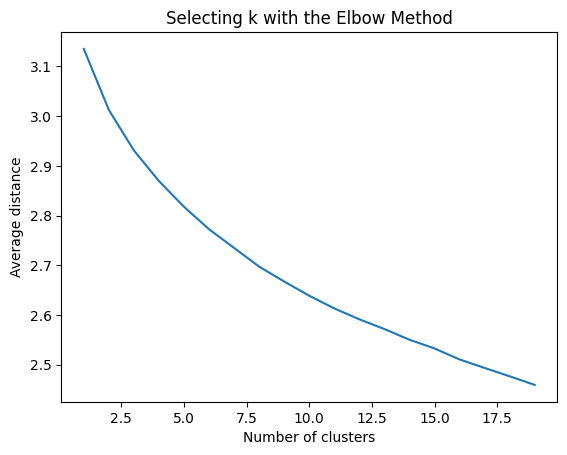

In [7]:
# K-means cluster analysis for 1-10 clusters due to the 10 possible class outcomes for poker hands
from scipy.spatial.distance import cdist
clusters=range(1, 20)
meandist = []

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))/clus_train.shape[0])

"""
Plot average distance from observations from the cluster centroid to use the Elbow Method to identify number of clusters to choose
"""

plt.plot(clusters, meandist)
plt.xlabel("Number of clusters")
plt.ylabel("Average distance")
plt.title("Selecting k with the Elbow Method")

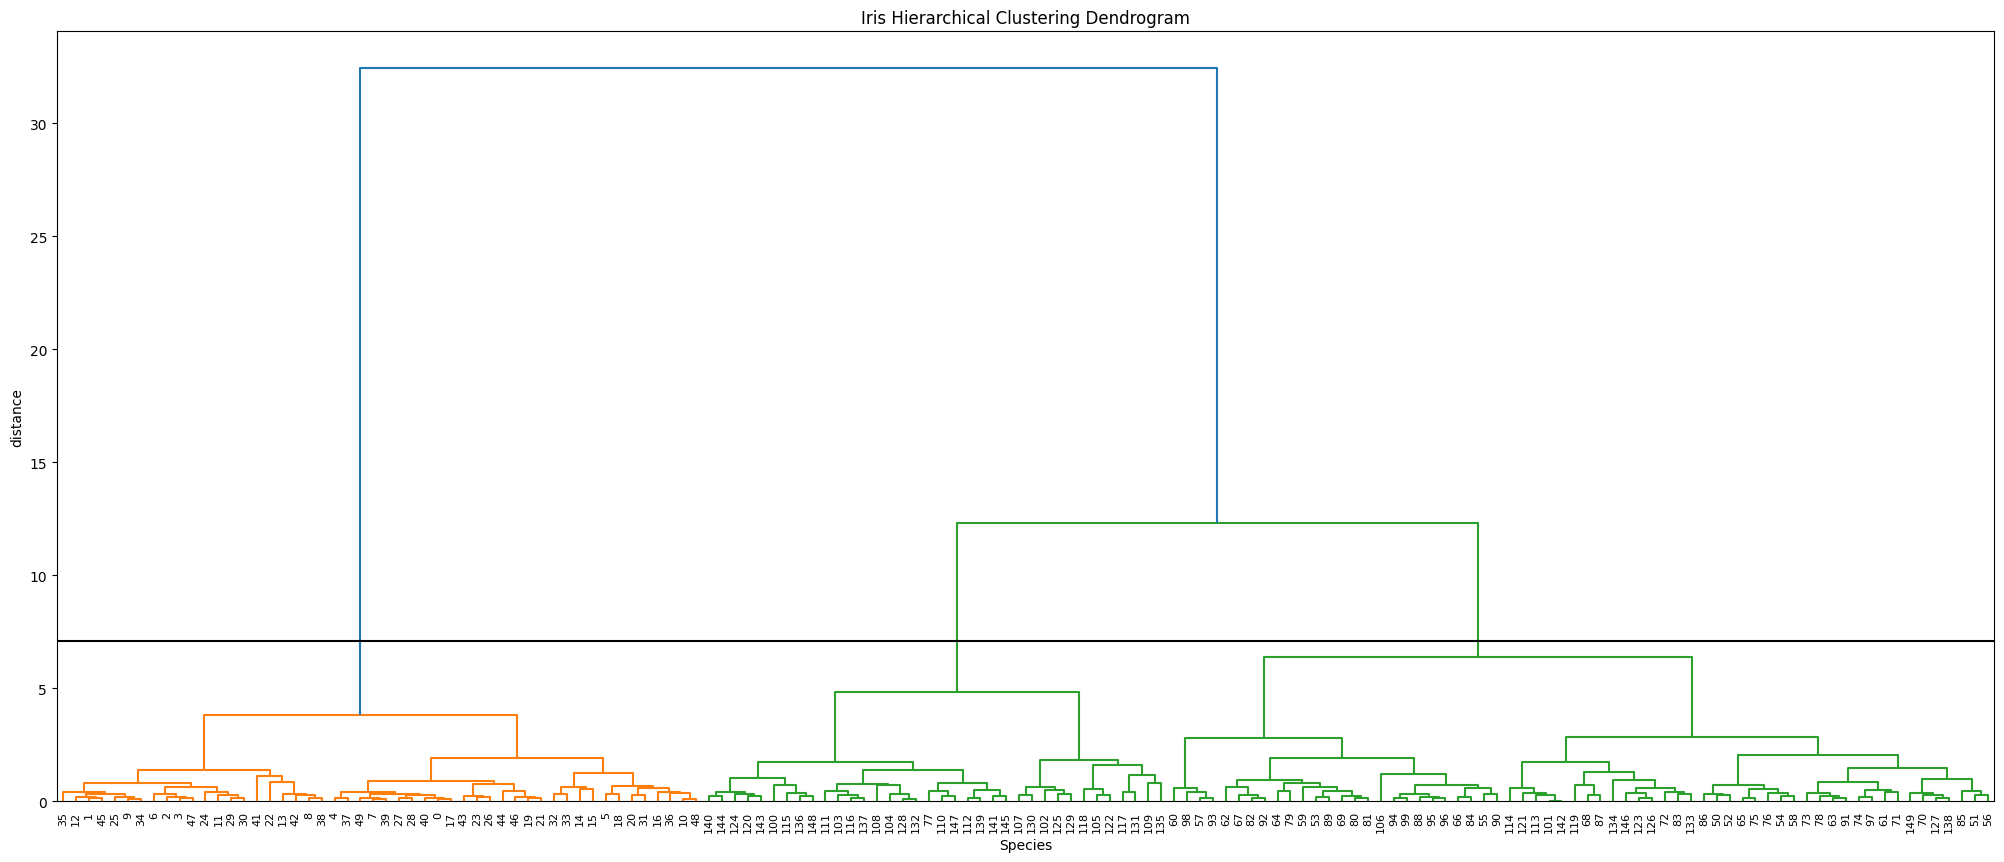

In [8]:
# Calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

# Generate the linkage matrix
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
Z = linkage(iris, 'ward')

# Set cut-off to 50
max_d = 7.08

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode = 'lastp',
    p = 150,
    leaf_rotation = 90.,
    leaf_font_size = 8.
)

plt.axhline(y=max_d, c='k')
plt.show()

In [9]:
from sklearn.datasets import fetch_openml

# Mengambil dataset MNIST dari OpenML
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

# Normalisasi data
x = mnist.data / 255.0
y = mnist.target.astype(int)  # Pastikan target dalam bentuk integer

# Menampilkan bentuk data
print(x.shape, y.shape)


(70000, 784) (70000,)


In [10]:
# Convert the matrix and vector to a Pandas DataFrame
feat_cols = ['pixel' + str(i) for i in range(x.shape[1])]

df = pd.DataFrame(x, columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i : str(i))

x, y = None, None

print("Size of the dataframe: {}".format(df.shape))

Size of the dataframe: (70000, 785)


In [11]:
rndperm = np.random.permutation(df.shape[0])

<Figure size 640x480 with 0 Axes>

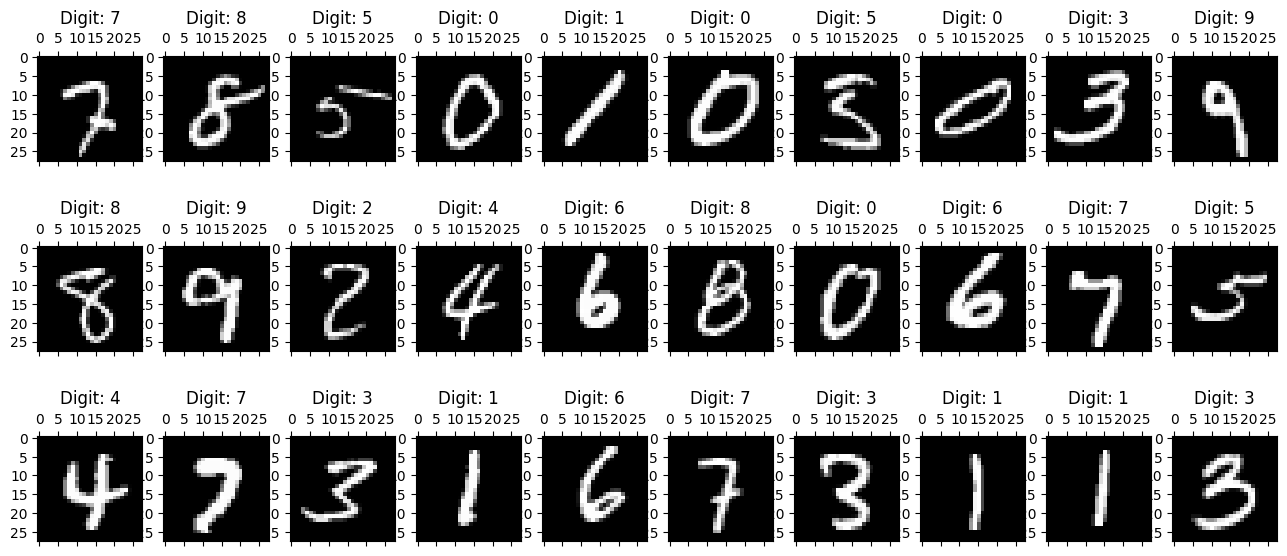

In [12]:
plt.gray()
fig = plt.figure(figsize=(16,7))
for i in range(0, 30):
    ax = fig.add_subplot(3, 10, i + 1, title='Digit: ' + str(df.loc[rndperm[i], 'label']))
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape(28, 28).astype(float))

plt.show()

In [13]:
import time
from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(df.loc[rndperm[:n_sne], feat_cols].values)

print("T-SNE done! Time elapsed: {} seconds".format(time.time() - time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.029s...
[t-SNE] Computed neighbors for 7000 samples in 2.186s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.229276
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.453621
[t-SNE] KL divergence after 300 iterations: 2.548968
T-SNE done! Time elapsed: 23.70286536216736 seconds


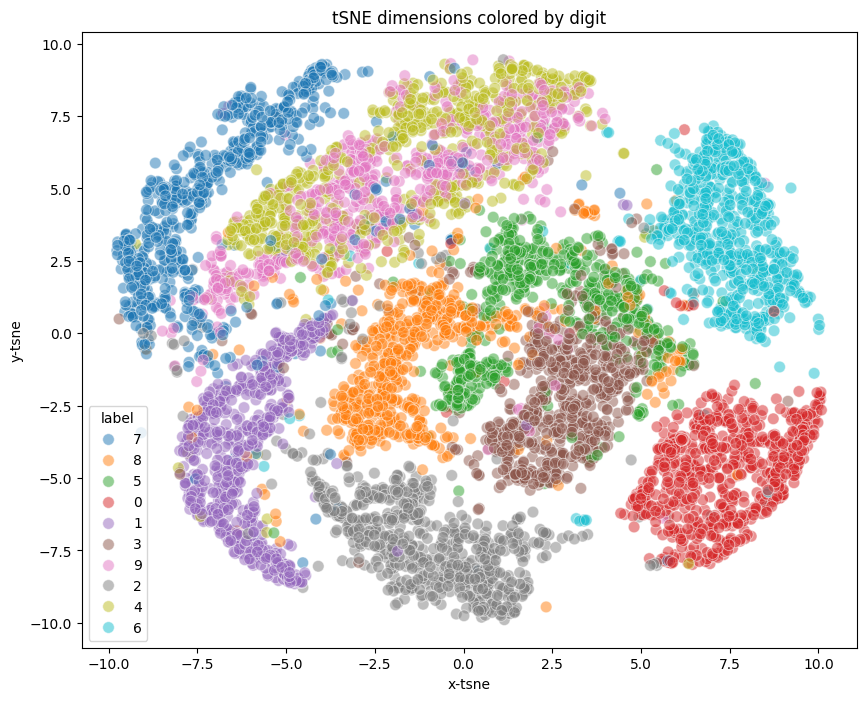

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menambahkan kolom hasil t-SNE ke DataFrame
df_tsne = df.loc[rndperm[:n_sne], :].copy()
df_tsne['x-tsne'] = tsne_result[:, 0]
df_tsne['y-tsne'] = tsne_result[:, 1]

# Membuat plot t-SNE dengan Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_tsne, x='x-tsne', y='y-tsne', hue='label', alpha=0.5, s=70)
plt.title("tSNE dimensions colored by digit")
plt.show()


In [15]:
student_data_mat = pd.read_csv("dataset/student-mat.csv", delimiter=',')
student_data_por = pd.read_csv("dataset/student-por.csv", delimiter=',')
student_data = pd.merge(student_data_mat, student_data_por, how="outer")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,4,13,13,13
1,GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,2,7,10,10
2,GP,F,15,R,GT3,T,1,1,other,other,...,5,5,5,1,1,1,2,8,9,9
3,GP,F,15,R,GT3,T,1,1,other,other,...,3,3,4,2,4,5,2,13,11,11
4,GP,F,15,R,GT3,T,1,1,other,other,...,3,3,4,2,4,5,2,8,6,5


In [16]:
student_data.isnull().values.any()

False

In [17]:
col_str = student_data.columns[student_data.dtypes == object]

In [18]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
student_data[col_str] = student_data[col_str].apply(lenc.fit_transform)

In [19]:
print(student_data[["G1", 'G2', 'G3']].corr())

          G1        G2        G3
G1  1.000000  0.858739  0.809142
G2  0.858739  1.000000  0.910743
G3  0.809142  0.910743  1.000000


In [20]:
student_data.drop(axis = 1, labels = ['G1', 'G2'])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,15,0,0,1,1,1,0,2,...,1,0,3,1,2,1,1,1,4,13
1,0,0,15,0,0,1,1,1,0,2,...,1,0,3,1,2,1,1,1,2,10
2,0,0,15,0,0,1,1,1,2,2,...,1,1,5,5,5,1,1,1,2,9
3,0,0,15,0,0,1,1,1,2,2,...,1,1,3,3,4,2,4,5,2,11
4,0,0,15,0,0,1,1,1,2,2,...,1,1,3,3,4,2,4,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,1,19,1,0,1,3,2,0,3,...,0,0,3,2,1,1,1,3,4,9
1040,1,1,19,1,1,1,1,1,2,0,...,1,0,3,2,3,3,3,5,5,9
1041,1,1,20,0,0,1,1,1,2,2,...,1,1,4,4,3,2,4,4,12,10
1042,1,1,20,1,1,0,2,2,3,3,...,0,0,5,5,4,4,5,4,11,9


In [21]:
label = student_data['G3'].values
predictors = student_data[student_data.columns[:-1]].values

[ 50.    73.64  77.17  80.38  83.02  84.91  86.69  88.42  90.04  91.41
  92.45  93.42  94.27  95.04  95.7   96.22  96.69  97.11  97.44  97.75
  98.05  98.33  98.6   98.85  99.06  99.25  99.43  99.59  99.74  99.85
  99.96 100.04]


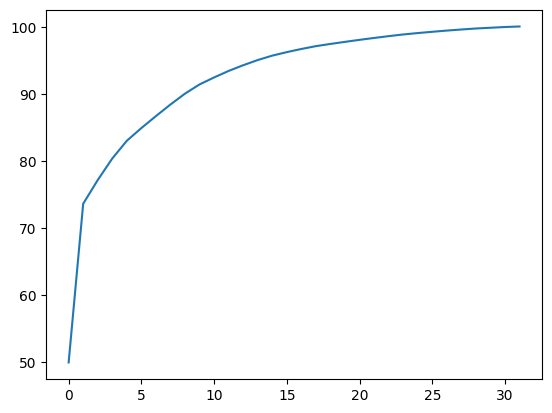

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(student_data.columns) -1)
pca.fit(predictors)
variance_ratio = pca.explained_variance_ratio_
variance_ratio_cum_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)
print(variance_ratio_cum_sum)
plt.plot(variance_ratio_cum_sum)
plt.show()

In [26]:
train = pd.read_csv('dataset/mnist_train.csv')
train.shape
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Save the labels to a Pandas series target
target = train['label']

# Drop the label feature
train = train.drop("label", axis=1)

In [28]:
# Standardizing MNIST dataset features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
train_x = train.values
train_x_std = StandardScaler().fit_transform(train_x)

# Calculating Eigenvectors and Eigenvalues of Covariance matrix
covariance_matrix = np.cov(train_x_std.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

# Creating a list of (eigenvalue, eigenvector)
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

# Sorting the eigenvalue, eigenvector pair from high to low
eigen_pairs.sort(key = lambda x: x[0], reverse = True)

# Calculating Individual and Cumulative explained variance
total_eigen_values = sum(eigen_values)
indivisual_exp_var = [(i / total_eigen_values) * 100 for i in sorted(eigen_values, reverse = True)]
cumulative_exp_var = np.cumsum(indivisual_exp_var)

In [29]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns

In [30]:
cumulative_plot = go.Scatter(
    x = list(range(784)),
    y = cumulative_exp_var,
    mode = 'lines+markers',
    name = "'Cumulative Explained Variance'",
    line = dict(
        shape = 'spline',
        color = 'limegreen',
    )
)

individual_plot = go.Scatter(
    x = list(range(784)),
    y = indivisual_exp_var,
    mode = 'lines+markers',
    name = "'Individual Explained Variance'",
    line = dict(
        shape = 'linear',
        color = 'black'
    )
)

fig = tls.make_subplots(insets=[{'cell' : (1,1), 'l' : 0.7, 'b' : 0.5}],
                        print_grid=True)

fig.append_trace(cumulative_plot, 1, 1)
fig.append_trace(individual_plot, 1, 1)
fig.layout.title = "Explained Variance plots - Full and Zoomed-in"
fig.layout.xaxis = dict(range=[0, 50], title = 'Feature columns')
fig.layout.yaxis = dict(range=[0, 40], title = 'Explained variance')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x,y ]

With insets:
[ x2,y2 ] over [ (1,1) x,y ]



In [34]:
# Invoke SKlearn's PCA method
n_components = 30
pca = PCA(n_components=n_components).fit(train.values)
eigenvalues = pca.components_.reshape(n_components, 28, 28)

# Extracting tha PCA components (eignevalues)
eigenvalues = pca.components_

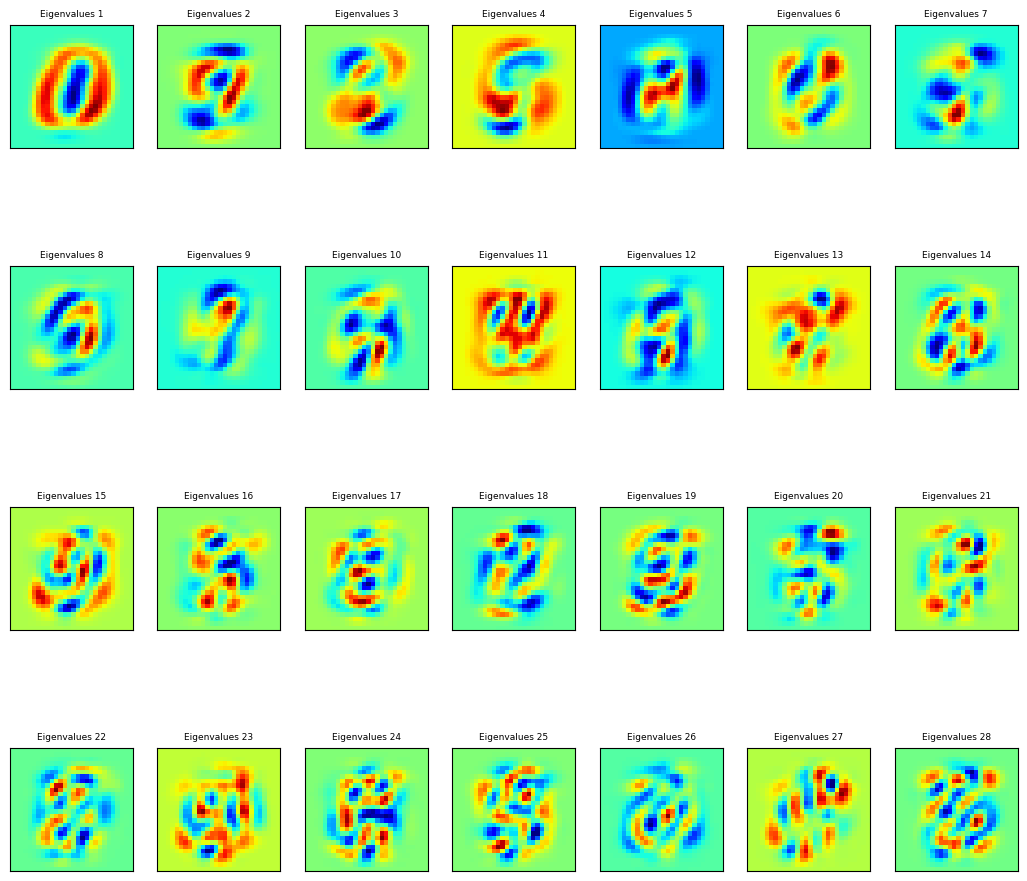

In [35]:
n_row = 4
n_col = 7

# Plot the first 8 eignenvalues
plt.figure(figsize=(13, 12))
for i in list(range(n_row * n_col)) :
    offset = 0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28, 28), cmap='jet')
    title_text = 'Eigenvalues ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())

plt.show()

In [36]:
# Delete our earlier created train_x object
del train_x

# Taking only the first N rows to speed things up
x = train[:6000].values
del train

# Standardising the values
x_std = StandardScaler().fit_transform(x)

# Call the PCA method with 5 components.
pca = PCA(n_components=5)
pca.fit(x_std)
x_5d = pca.transform(x_std)

# Restrict the target values also for speed up
target = target[:6000]

In [38]:
from sklearn.cluster import KMeans

# Set a KMeans clustering with 9 components
kmeans = KMeans(n_clusters=9)

# Compute cluster centers and predict cluster indices
x_clustered = kmeans.fit_predict(x_5d)

trace_kmeans = go.Scatter(x=x_5d[:,0], y = x_5d[:,1], mode='markers',
                          showlegend=False,
                          marker=dict(
                              size=8,
                              color=x_clustered,
                              colorscale='Portland',
                              showscale=False,
                              line=dict(
                                  width=2,
                                  color='rgb(255, 255, 255)'
                              )
                          ))

In [39]:
layout = go.Layout(
    title = 'KMeans Clustering',
    hovermode = 'closest',
    xaxis = dict(
        title = 'First Principal Component',
        ticklen = 5,
        zeroline = False,
        gridwidth = 2,
    ),
    yaxis = dict(
        title = 'Second Principal Component',
        ticklen = 5,
        gridwidth = 2,
    ),
    showlegend = True
)

data = [trace_kmeans]
fig1 = dict(data=data, layout=layout)

# fig1.append_trace(contour_list)
py.iplot(fig1, filename="svm")